In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import time
from ripser import ripser
import tadasets
from persim import plot_diagrams

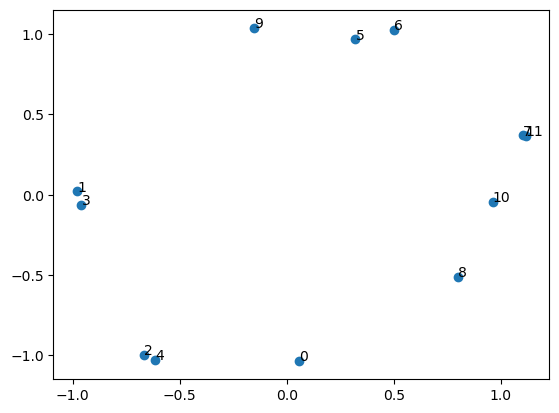

In [60]:
# x = np.random.random((100,2))
# https://ripser.scikit-tda.org/notebooks/Representative%20Cocycles.html
np.random.seed(9)
x = tadasets.dsphere(n=12, d=1, noise=0.1)
plt.scatter(x[:,0], x[:,1])
for i in range(x.shape[0]):
    plt.text(x[i,0], x[i,1], str(i))
plt.show()

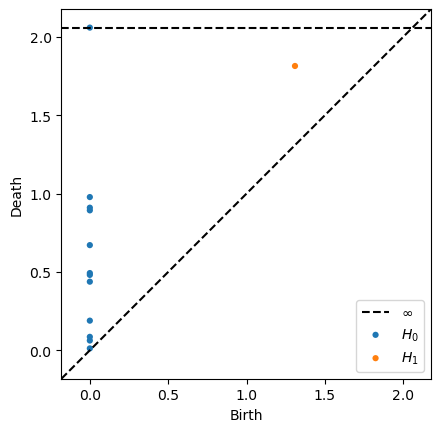

In [51]:
result = ripser(x,do_cocycles=True)
diagrams = result['dgms']
cocycles = result['cocycles']
D = result['dperm2all']
plot_diagrams(diagrams, show=True)

In [52]:
dgm1 = diagrams[1]
idx = np.argmax(dgm1[:, 1] - dgm1[:, 0])
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

In [53]:
cocycle

array([[9, 1, 1],
       [9, 3, 1],
       [5, 1, 1],
       [5, 3, 1],
       [6, 1, 1],
       [8, 3, 1]])

In [70]:
# These are points of representative cocycle of highest birth-death point
# They represent the row indices of the original dataset
set(cocycle[:,:2].flatten())

{1, 3, 5, 6, 8, 9}

In [73]:
?ripser

In [72]:
cocycles

[[],
 [array([[9, 1, 1],
         [9, 3, 1],
         [5, 1, 1],
         [5, 3, 1],
         [6, 1, 1],
         [8, 3, 1]])]]

/home/harryem/anaconda3/envs/bats_p37/lib/python3.7/site-packages/ripser/ripser.py:216: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  + "this was a distance matrix?"


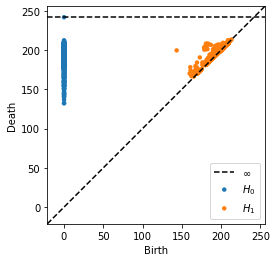

Time: 136.8 seconds


In [5]:
# PCA
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

start = time.time()
result = ripser(gt_matrix_PCs, coeff=2, maxdim=1, do_cocycles=True)
diagrams = result['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

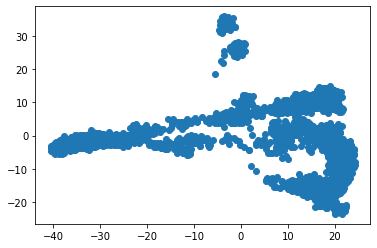

In [3]:
gt_matrix_PCs = np.load('/home/harryem/data/HimalGen/gt_matrix_PCs.npy').T.astype(float)

# plt.scatter(gt_matrix_PCs[:,0], gt_matrix_PCs[:,1])

In [24]:
dgm1 = diagrams[1]
ordered_cocyles = np.argsort(dgm1[:, 1] - dgm1[:, 0])[::-1]
idx = ordered_cocyles[0]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

In [25]:
cocycle

array([[4218, 4147,    1],
       [4146, 4114,    1],
       [4218, 4114,    1],
       [4218, 4127,    1],
       [4219, 4114,    1],
       [4218, 4128,    1],
       [4147, 4114,    1]])

In [26]:
individuals = set(cocycle[:,:2].flatten() // 2)
individuals 

{2057, 2063, 2064, 2073, 2109}

In [27]:
labels = pd.read_csv('~/../projects/HimalGenAsia/HimalGen.popinfo.csv',sep=',')
labels.loc[individuals]

,FID,FAMID,IID,PID,MID,SEX,PHENOTYPE,HimalGen_indorder,POP,POP_SIMPLE,...,POP_COLOR,SPOP_COLOR,Region,Language,Language_family,Study,Chip,LAT,LONG,ALT
2057,PJL,HG02681,HG02681,0,0,0,-9,4000,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2063,PJL,HG02690,HG02690,0,0,0,-9,4006,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2064,PJL,HG02691,HG02691,0,0,0,-9,4007,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2073,PJL,HG02728,HG02728,0,0,0,-9,4016,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2109,PJL,HG03629,HG03629,0,0,0,-9,4052,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN


In [34]:
idx = ordered_cocyles[2]
cocycle = cocycles[1][idx]
individuals = set(cocycle[:,:2].flatten() // 2)
print(individuals)
labels.loc[individuals]

{64, 65, 66, 1027, 548, 2051, 550, 1037, 2035, 2041, 2393, 58, 61, 574}


,FID,FAMID,IID,PID,MID,SEX,PHENOTYPE,HimalGen_indorder,POP,POP_SIMPLE,...,POP_COLOR,SPOP_COLOR,Region,Language,Language_family,Study,Chip,LAT,LONG,ALT
64,BEB,HG03911,HG03911,0,0,0,-9,764,BEB,Bengali,...,#8b008b,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
65,BEB,HG03913,HG03913,0,0,0,-9,765,BEB,Bengali,...,#8b008b,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
66,BEB,HG03914,HG03914,0,0,0,-9,766,BEB,Bengali,...,#8b008b,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
1027,urn:wtsi:H1094,urn:wtsi:H1094,urn:wtsi:H1094,0,0,1,1,4570,TOT,Toto,...,#ff99ff,#ff69ff,Himalaya,NaN,Tibeto-Burman,MBE,NaN,26.67,89.0,86.0
548,CHB,NA18618,NA18618,0,0,0,-9,1106,CHB,Han Chinese,...,#adcd00,#adff33,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2051,PJL,HG02654,HG02654,0,0,0,-9,3994,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
550,CHB,NA18620,NA18620,0,0,0,-9,1108,CHB,Han Chinese,...,#adcd00,#adff33,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
1037,urn:wtsi:H1114,urn:wtsi:H1114,urn:wtsi:H1114,0,0,1,1,4580,TOT,Toto,...,#ff99ff,#ff69ff,Himalaya,NaN,Tibeto-Burman,MBE,NaN,26.67,89.0,86.0
2035,PJL,HG01586,HG01586,0,0,0,-9,3978,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN
2041,PJL,HG02494,HG02494,0,0,0,-9,3984,PJL,Punjabi,...,#e11289,#ff30ff,Non_Himalaya,NaN,NaN,1KG,MEGA,NaN,NaN,NaN


In [29]:
cocycle

19586

In [22]:
idx

19586

## Manhattan distance matrix

In [38]:
D_Full_Man = np.load('/home/harryem/data/HimalGen/D_Full_Man.npy')
D_Full_Man = scipy.spatial.distance.squareform(D_Full_Man)

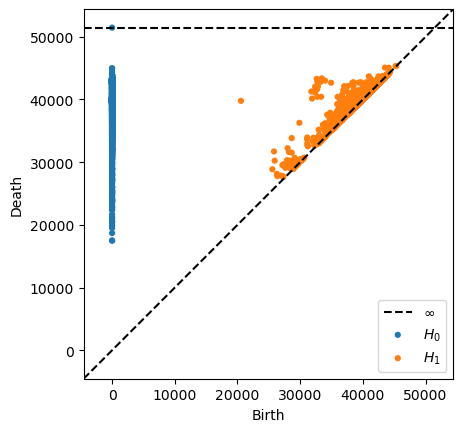

Time: 179.5 seconds


In [39]:
start = time.time()
result = ripser(D_Full_Man, coeff=2, maxdim=1, do_cocycles=True, distance_matrix=True)
diagrams = result['dgms']
plot_diagrams(diagrams, show=True)

print("Time: {:.1f} seconds".format(time.time() - start))

In [40]:
ordered_cocyles = np.argsort(dgm1[:, 1] - dgm1[:, 0])[::-1]
idx = ordered_cocyles[0]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]
cocycle

IndexError: list index out of range

In [49]:
ordered_cocyles.shape

(19587,)

In [ ]:
individuals = set(cocycle[:,:2].flatten() // 2)
individuals 

In [ ]:
labels.loc[individuals]

In [ ]:
k=1

idx = ordered_cocyles[k]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

individuals = set(cocycle[:,:2].flatten() // 2)
labels.loc[individuals]

In [ ]:
k=2

idx = ordered_cocyles[k]
cocycles = result['cocycles']
D = result['dperm2all']
cocycle = cocycles[1][idx]

individuals = set(cocycle[:,:2].flatten() // 2)
labels.loc[individuals]

In [44]:
len(cocycles[1])

19586

In [45]:
idx

19586